In [1]:
import setGPU

import sys

import tensorflow as tf
slim = tf.contrib.slim
sys.path.append('/mnt/Veeru/cv_exp/src/TF-code/models-master/research/slim')

from nets.inception_resnet_v2 import *

from PIL import Image
import os
import numpy as np
from matplotlib import pyplot as plt

setGPU: Setting GPU to: 0


/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.




In [2]:
np.set_printoptions(threshold=np.inf) #this will help to print all the values in a numpy array

In [3]:
#Restore pretrained graph
checkpoint_file = '/mnt/Veeru/gcp_backup/models/inception_resnet_v2_2016_08_30.ckpt'
data_path = '/mnt/data/clustering/1501201/0'

tf.reset_default_graph()

arg_scope = inception_resnet_v2_arg_scope()
input_tensor = tf.placeholder(dtype=tf.float32, shape=(1, 299, 299, 3), name='input_tensor')
with slim.arg_scope(arg_scope):
    logits, end_points = inception_resnet_v2(input_tensor, is_training=False)

saver = tf.train.Saver()
sess = tf.Session() 
saver.restore(sess, checkpoint_file)

#extract logits for all the images one by one
for filename in os.listdir(data_path):
    file_path = os.path.join(data_path, filename)
    img = Image.open(file_path).resize((299, 299))
    im = np.array(img)
    im = 2*(im/255.0)-1.0
    im = im.reshape(-1, 299, 299, 3)

    predict_values, logit_values = sess.run([end_points['Logits'], logits], feed_dict={input_tensor:im})


Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /mnt/Veeru/gcp_backup/models/inception_resnet_v2_2016_08_30.ckpt


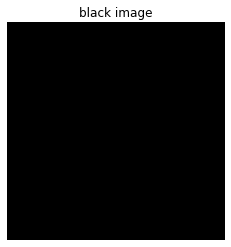

(1, 1001) (1, 1001)


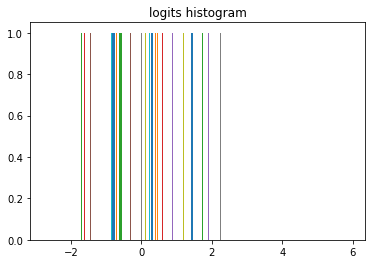

In [4]:
#extract features from black image and plot histogram
black_image_path = '/mnt/data/clustering/1501201/0/15.jpg'

#read and display image
b_img = Image.open(black_image_path).resize((299, 299))
plt.imshow(b_img)
plt.title("black image")
plt.axis('off')
plt.show()

#normalize and reshape
b_im = np.array(b_img)
b_im = 2*(im/255.0)-1.0
b_im = b_im.reshape(-1, 299, 299, 3)
    
#extract logits
b_predict_values, b_logit_values = sess.run([end_points['Logits'], logits], feed_dict={input_tensor:b_im})
print(b_predict_values.shape, b_logit_values.shape)

#plot histogram
plt.hist(b_logit_values)
plt.title("logits histogram")
plt.show()

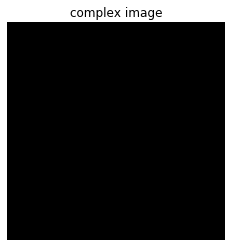

(1, 1001) (1, 1001)


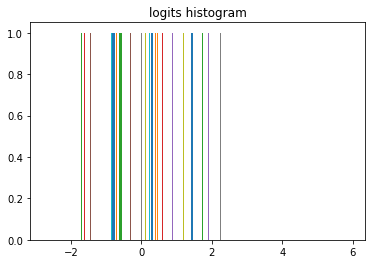

In [6]:
#extract logits from complex image and plot histogram
complex_image_path = '/mnt/data/clustering/1501201/0/25.jpg'

#read and display image
c_img = Image.open(complex_image_path).resize((299, 299))
plt.imshow(c_img)
plt.title("complex image")
plt.axis('off')
plt.show()

#normalize and reshape
c_im = np.array(c_img)
c_im = 2*(im/255.0)-1.0
c_im = c_im.reshape(-1, 299, 299, 3)
    
#extract logits
c_predict_values, c_logit_values = sess.run([end_points['Logits'], logits], feed_dict={input_tensor:c_im})
print(c_predict_values.shape, c_logit_values.shape)

#plot histogram
plt.hist(c_logit_values)
plt.title("logits histogram")
plt.show()

sess.close()